# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

from scipy.stats import linregress



#Get 2019 Data
CapitalBike201901 = "../UnzipRawFiles/2019/201901-capitalbikeshare-tripdata.csv"
CapitalBike201902 = "../UnzipRawFiles/2019/201902-capitalbikeshare-tripdata.csv"
CapitalBike201903 = "../UnzipRawFiles/2019/201903-capitalbikeshare-tripdata.csv"
CapitalBike201904 = "../UnzipRawFiles/2019/201904-capitalbikeshare-tripdata.csv"
CapitalBike201905 = "../UnzipRawFiles/2019/201905-capitalbikeshare-tripdata.csv"
CapitalBike201906 = "../UnzipRawFiles/2019/201906-capitalbikeshare-tripdata.csv"
CapitalBike201907 = "../UnzipRawFiles/2019/201907-capitalbikeshare-tripdata.csv"
CapitalBike201908 = "../UnzipRawFiles/2019/201908-capitalbikeshare-tripdata.csv"
CapitalBike201909 = "../UnzipRawFiles/2019/201909-capitalbikeshare-tripdata.csv"
CapitalBike201910 = "../UnzipRawFiles/2019/201910-capitalbikeshare-tripdata.csv"
CapitalBike201911 = "../UnzipRawFiles/2019/201911-capitalbikeshare-tripdata.csv"
CapitalBike201912 = "../UnzipRawFiles/2019/201912-capitalbikeshare-tripdata.csv"



CapitalBike201901_df = pd.read_csv(CapitalBike201901)
CapitalBike201902_df = pd.read_csv(CapitalBike201902)
CapitalBike201903_df = pd.read_csv(CapitalBike201903)
CapitalBike201904_df = pd.read_csv(CapitalBike201904)
CapitalBike201905_df = pd.read_csv(CapitalBike201905)
CapitalBike201906_df = pd.read_csv(CapitalBike201906)
CapitalBike201907_df = pd.read_csv(CapitalBike201907)
CapitalBike201908_df = pd.read_csv(CapitalBike201908)
CapitalBike201909_df = pd.read_csv(CapitalBike201909)
CapitalBike201910_df = pd.read_csv(CapitalBike201910)
CapitalBike201911_df = pd.read_csv(CapitalBike201911)
CapitalBike201912_df = pd.read_csv(CapitalBike201912)

In [4]:
CapitalBike201906_df.tail()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
350139,733,2019-06-30 23:57:17,2019-07-01 00:09:30,31609,Maine Ave & 7th St SW,31610,Eastern Market / 7th & North Carolina Ave SE,W22399,Casual
350140,5127,2019-06-30 23:58:11,2019-07-01 01:23:39,31292,22nd St & Constitution Ave NW,31261,21st St & Constitution Ave NW,W20536,Casual
350141,5145,2019-06-30 23:58:24,2019-07-01 01:24:10,31292,22nd St & Constitution Ave NW,31261,21st St & Constitution Ave NW,W20531,Casual
350142,331,2019-06-30 23:59:08,2019-07-01 00:04:39,31610,Eastern Market / 7th & North Carolina Ave SE,31612,D St & Maryland Ave NE,W00795,Member
350143,467,2019-06-30 23:59:17,2019-07-01 00:07:05,31319,Wisconsin Ave & Brandywine St NW,32014,Friendship Hts Metro / Wisconsin Ave & Wiscons...,W23253,Casual


In [5]:
combined_2019_df = pd.concat([CapitalBike201901_df, CapitalBike201902_df,CapitalBike201903_df,CapitalBike201904_df, CapitalBike201905_df, CapitalBike201906_df,CapitalBike201907_df,CapitalBike201908_df,CapitalBike201909_df,CapitalBike201910_df,CapitalBike201911_df,CapitalBike201912_df], ignore_index=True)


In [6]:
combined_2019_df.count()

Duration                3398417
Start date              3398417
End date                3398417
Start station number    3398417
Start station           3398417
End station number      3398417
End station             3398417
Bike number             3398403
Member type             3398417
dtype: int64

In [7]:
#cleanup
combined_2019_df.dropna(inplace = True)

In [8]:
combined_2019_df.count()

Duration                3398403
Start date              3398403
End date                3398403
Start station number    3398403
Start station           3398403
End station number      3398403
End station             3398403
Bike number             3398403
Member type             3398403
dtype: int64

In [9]:
combined_2019_df['DateTime'] =  pd.to_datetime(combined_2019_df['Start date'], format='%Y-%m-%d %H:%M:%S')
# extracting time from timestamp
combined_2019_df['Time'] = combined_2019_df['DateTime'].dt.strftime('%H:%M')
combined_2019_df['Month'] = combined_2019_df['DateTime'].dt.strftime('%b')
combined_2019_df['Date'] = combined_2019_df['DateTime'].dt.strftime('%x')
#combined_2019_df.tail()

In [10]:
combined_2019_df = combined_2019_df.drop(['Start station number','Start station','End station number','End station'], axis = 1)

combined_2019_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,E00141,Member,2019-01-01 00:04:48,00:04,Jan,01/01/19
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,W24067,Casual,2019-01-01 00:06:37,00:06,Jan,01/01/19
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,W22654,Casual,2019-01-01 00:08:46,00:08,Jan,01/01/19
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,W22336,Member,2019-01-01 00:08:47,00:08,Jan,01/01/19
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,70004,Member,2019-01-01 00:12:29,00:12,Jan,01/01/19


In [11]:
combined_2019_df["DayName"] = combined_2019_df["DateTime"].dt.day_name()
combined_2019_df["DayNum"] = combined_2019_df["DateTime"].dt.weekday

outlierIndex = combined_2019_df[combined_2019_df["Duration"] 
                                > (combined_2019_df["Duration"].mean() + (2 * (combined_2019_df["Duration"].std())))].index

combined_2019_df.drop(outlierIndex, inplace=True)

sample_2019_df = combined_2019_df.sample(200)
sample_2019_df["DayInYear"] = sample_2019_df["DateTime"].dt.strftime('%j')
sorted_sample_df = sample_2019_df.sort_values(by="Date")
sorted_sample_df.sort_values(by="DayNum", inplace=True)
sorted_sample_df.tail()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date,DayName,DayNum,DayInYear
2741451,812,2019-10-06 12:24:35,2019-10-06 12:38:08,W20494,Member,2019-10-06 12:24:35,12:24,Oct,10/06/19,Sunday,6,279
2826038,1463,2019-10-13 12:47:43,2019-10-13 13:12:07,W20293,Member,2019-10-13 12:47:43,12:47,Oct,10/13/19,Sunday,6,286
2822824,2229,2019-10-13 07:12:59,2019-10-13 07:50:09,W22153,Casual,2019-10-13 07:12:59,07:12,Oct,10/13/19,Sunday,6,286
1910065,745,2019-07-28 11:18:48,2019-07-28 11:31:13,W23315,Member,2019-07-28 11:18:48,11:18,Jul,07/28/19,Sunday,6,209
1754975,3095,2019-07-14 19:06:21,2019-07-14 19:57:57,W00890,Casual,2019-07-14 19:06:21,19:06,Jul,07/14/19,Sunday,6,195


In [12]:

#combined_2019_df.to_csv('2019Data.csv', index = False)


In [13]:
#get 2020 data
CapitalBike202001 = "../UnzipRawFiles/2020/202001-capitalbikeshare-tripdata.csv"
CapitalBike202002 = "../UnzipRawFiles/2020/202002-capitalbikeshare-tripdata.csv"
CapitalBike202003 = "../UnzipRawFiles/2020/202003-capitalbikeshare-tripdata.csv"
CapitalBike202005 = "../UnzipRawFiles/2020/202005-capitalbikeshare-tripdata.csv"
CapitalBike202006 = "../UnzipRawFiles/2020/202006-capitalbikeshare-tripdata.csv"
CapitalBike202007 = "../UnzipRawFiles/2020/202007-capitalbikeshare-tripdata.csv"
CapitalBike202008 = "../UnzipRawFiles/2020/202008-capitalbikeshare-tripdata.csv"
CapitalBike202009 = "../UnzipRawFiles/2020/202009-capitalbikeshare-tripdata.csv"
CapitalBike202010 = "../UnzipRawFiles/2020/202010-capitalbikeshare-tripdata.csv"
CapitalBike202011 = "../UnzipRawFiles/2020/202011-capitalbikeshare-tripdata.csv"
CapitalBike202012 = "../UnzipRawFiles/2020/202012-capitalbikeshare-tripdata.csv"


CapitalBike202001_df = pd.read_csv(CapitalBike202001)
CapitalBike202002_df = pd.read_csv(CapitalBike202002)
CapitalBike202003_df = pd.read_csv(CapitalBike202003)
CapitalBike202005_df = pd.read_csv(CapitalBike202005)
CapitalBike202006_df = pd.read_csv(CapitalBike202006)
CapitalBike202007_df = pd.read_csv(CapitalBike202007)
CapitalBike202008_df = pd.read_csv(CapitalBike202008)
CapitalBike202009_df = pd.read_csv(CapitalBike202009)
CapitalBike202010_df = pd.read_csv(CapitalBike202010)
CapitalBike202011_df = pd.read_csv(CapitalBike202011)
CapitalBike202012_df = pd.read_csv(CapitalBike202012)

In [14]:
CapitalBike202007_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,453843A617C5BA52,docked_bike,2020-07-22 05:37:39,2020-07-22 05:41:01,11th & M St NW,31266.0,14th & L St NW,31283.0,38.905579,-77.027313,38.903658,-77.031737,member
1,FFCF14024AC20363,docked_bike,2020-07-05 15:59:09,2020-07-05 16:15:12,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd & N Illinois St,31902.0,38.879476,-77.114563,38.876528,-77.127120,member
2,B2F1307EF206C973,docked_bike,2020-07-11 09:11:30,2020-07-11 09:25:54,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd & N Illinois St,31902.0,38.879476,-77.114563,38.876528,-77.127120,member
3,6694BCE0612D1823,electric_bike,2020-07-16 08:44:44,2020-07-16 09:08:49,Philadelphia & Maple Ave,32010.0,East West Hwy & Blair Mill Rd,32019.0,38.981202,-77.011275,38.990422,-77.029423,member
4,251D19F64439E1F4,docked_bike,2020-07-27 12:09:55,2020-07-27 13:58:37,Wilson Blvd. & N. Vermont St.,31926.0,Utah St & 11th St N,31049.0,38.879476,-77.114563,38.883669,-77.113905,casual


In [15]:
#combine data
#combined_2020_df = pd.concat([CapitalBike202001_df, CapitalBike202002_df,CapitalBike202003_df, CapitalBike202005_df, CapitalBike202006_df, CapitalBike202007_df, CapitalBike202008_df, CapitalBike202009_df, CapitalBike202010_df, CapitalBike202011_df, CapitalBike202012_df], ignore_index=True)
# #get columns that are needed
#combined_2020_df = combined_2020_df[["Duration", "Start date","End date","Start station number","Start station","End station number","End station","Bike number","Member type"]]

#====Data format changed between March 2020 and May 2020....converted May-Dec dataset to align with Jan2019 - Mar2020 datasets.
combined_2020_1st_df = pd.concat([CapitalBike202001_df, CapitalBike202002_df,CapitalBike202003_df], ignore_index=True)
combined_2020_2nd_df = pd.concat([CapitalBike202005_df, CapitalBike202006_df, CapitalBike202007_df, CapitalBike202008_df, CapitalBike202009_df, CapitalBike202010_df, CapitalBike202011_df, CapitalBike202012_df], ignore_index=True)
#====Had to create a duration column in seconds from starting and ending times to alighn with 2019 data.
combined_2020_2nd_df['Duration'] = pd.to_timedelta(pd.to_datetime(combined_2020_2nd_df['ended_at'], format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(combined_2020_2nd_df['started_at'], format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()
combined_2020_2ndcol_df = combined_2020_2nd_df[['Duration','started_at','ended_at','start_station_id','start_station_name','end_station_id','end_station_name','ride_id','member_casual']]
combined_2020_2ndcol_df = combined_2020_2ndcol_df.rename(columns={'started_at':'Start date','ended_at':'End date','start_station_id':'Start station number','start_station_name':'Start station','end_station_id':'End station number','end_station_name':'End station','ride_id':'Bike number','member_casual':'Member type'})

In [16]:
combined_2020_2ndcol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604043 entries, 0 to 1604042
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Duration              1604043 non-null  float64
 1   Start date            1604043 non-null  object 
 2   End date              1604043 non-null  object 
 3   Start station number  1519404 non-null  float64
 4   Start station         1519404 non-null  object 
 5   End station number    1506999 non-null  float64
 6   End station           1506999 non-null  object 
 7   Bike number           1604043 non-null  object 
 8   Member type           1604043 non-null  object 
dtypes: float64(3), object(6)
memory usage: 110.1+ MB


In [17]:
combined_2020_1st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537400 entries, 0 to 537399
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Duration              537400 non-null  int64 
 1   Start date            537400 non-null  object
 2   End date              537400 non-null  object
 3   Start station number  537400 non-null  int64 
 4   Start station         537400 non-null  object
 5   End station number    537400 non-null  int64 
 6   End station           537400 non-null  object
 7   Bike number           537400 non-null  object
 8   Member type           537400 non-null  object
dtypes: int64(3), object(6)
memory usage: 36.9+ MB


In [18]:
#---NEW consolidated 2020 dataset
combined_2020_df = pd.concat([combined_2020_1st_df, combined_2020_2ndcol_df], ignore_index=True)
combined_2020_df = combined_2020_df.drop(['Start station number','Start station','End station number','End station'], axis = 1)
combined_2020_df.tail()

,Duration,Start date,End date,Bike number,Member type
2141438,1627.0,2020-12-12 13:49:55,2020-12-12 14:17:02,A10ED3D50E5AB612,casual
2141439,1365.0,2020-12-03 13:43:26,2020-12-03 14:06:11,F146CC9669ABF5EC,casual
2141440,2159.0,2020-12-06 07:27:47,2020-12-06 08:03:46,614005BC98FE93F7,casual
2141441,2458.0,2020-12-21 13:46:01,2020-12-21 14:26:59,86783BF38F4567FA,casual
2141442,846.0,2020-12-18 09:09:48,2020-12-18 09:23:54,A7F61D67643CB526,member


In [19]:
#combined_2020_df.dropna(inplace = True)
#No clean up needed as count matches
#combined_2020_df.dropna(inplace = True)

In [20]:
combined_2020_df.count()


#combined_2020_df.to_csv('2020Data.csv', index = False)

Duration       2141443
Start date     2141443
End date       2141443
Bike number    2141443
Member type    2141443
dtype: int64

In [21]:
#Cleanup and create data
combined_2020_df['DateTime'] =  pd.to_datetime(combined_2020_df['Start date'], format='%Y-%m-%d %H:%M:%S')
# extracting time from timestamp
combined_2020_df['Time'] = combined_2020_df['DateTime'].dt.strftime('%H:%M')
combined_2020_df['Month'] = combined_2020_df['DateTime'].dt.strftime('%b')
combined_2020_df['Date'] = combined_2020_df['DateTime'].dt.strftime('%x')
combined_2020_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date
0,506.0,2020-01-01 00:00:59,2020-01-01 00:09:26,W22189,Member,2020-01-01 00:00:59,00:00,Jan,01/01/20
1,1050.0,2020-01-01 00:01:16,2020-01-01 00:18:47,W21067,Member,2020-01-01 00:01:16,00:01,Jan,01/01/20
2,1687.0,2020-01-01 00:02:42,2020-01-01 00:30:50,W24359,Member,2020-01-01 00:02:42,00:02,Jan,01/01/20
3,182.0,2020-01-01 00:02:44,2020-01-01 00:05:47,W23334,Member,2020-01-01 00:02:44,00:02,Jan,01/01/20
4,1002.0,2020-01-01 00:06:12,2020-01-01 00:22:54,W23441,Member,2020-01-01 00:06:12,00:06,Jan,01/01/20


In [22]:
combined_2020_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date
0,506.0,2020-01-01 00:00:59,2020-01-01 00:09:26,W22189,Member,2020-01-01 00:00:59,00:00,Jan,01/01/20
1,1050.0,2020-01-01 00:01:16,2020-01-01 00:18:47,W21067,Member,2020-01-01 00:01:16,00:01,Jan,01/01/20
2,1687.0,2020-01-01 00:02:42,2020-01-01 00:30:50,W24359,Member,2020-01-01 00:02:42,00:02,Jan,01/01/20
3,182.0,2020-01-01 00:02:44,2020-01-01 00:05:47,W23334,Member,2020-01-01 00:02:44,00:02,Jan,01/01/20
4,1002.0,2020-01-01 00:06:12,2020-01-01 00:22:54,W23441,Member,2020-01-01 00:06:12,00:06,Jan,01/01/20


In [23]:
combined_2019_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date,DayName,DayNum
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,E00141,Member,2019-01-01 00:04:48,00:04,Jan,01/01/19,Tuesday,1
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,W24067,Casual,2019-01-01 00:06:37,00:06,Jan,01/01/19,Tuesday,1
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,W22654,Casual,2019-01-01 00:08:46,00:08,Jan,01/01/19,Tuesday,1
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,W22336,Member,2019-01-01 00:08:47,00:08,Jan,01/01/19,Tuesday,1
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,70004,Member,2019-01-01 00:12:29,00:12,Jan,01/01/19,Tuesday,1


In [24]:
#combined_2020_NeededColumns_df.to_csv('2020Data.csv', index = False)

In [25]:
sum_2019 = combined_2019_df['Month'].value_counts()
sum_2019

Sep    354565
Aug    353107
Jul    348645
Jun    342450
Apr    338481
Oct    333048
May    330599
Mar    248497
Nov    221568
Dec    160576
Feb    156358
Jan    149158
Name: Month, dtype: int64

In [26]:
sum_2020 = combined_2020_df['Month'].value_counts()
sum_2020 = pd.concat([sum_2020.iloc[:1], pd.Series(0, ['Apr']),sum_2020[1:]])
sum_2020

Aug    251603
Apr         0
Sep    249899
Oct    229832
Jul    228347
Jun    214047
Jan    196969
Feb    177901
Nov    175435
Mar    162530
May    149051
Dec    105829
dtype: int64

In [27]:
#pd.concat([sum_2020.iloc[:1], pd.Series('Apr', [0]),sum_2020[1:]])
type(sum_2020)


pandas.core.series.Series

In [28]:
is_May = combined_2019_df['Month']=='May'
may_2019_df = combined_2019_df[is_May]
#may_2019_df.head()
may_sample_df = may_2019_df.sample(200)
#may_sample_df.tail()
sorted_may_sample_df = may_sample_df.sort_values(by="Date")
sorted_may_sample_df.sort_values(by="DayNum", inplace=True)
sorted_may_sample_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date,DayName,DayNum
1109123,762,2019-05-20 08:01:42,2019-05-20 08:14:24,W24125,Member,2019-05-20 08:01:42,08:01,May,05/20/19,Monday,0
1112901,1882,2019-05-20 14:35:32,2019-05-20 15:06:54,W23111,Casual,2019-05-20 14:35:32,14:35,May,05/20/19,Monday,0
1118244,825,2019-05-20 20:31:30,2019-05-20 20:45:15,W00443,Member,2019-05-20 20:31:30,20:31,May,05/20/19,Monday,0
1116074,1001,2019-05-20 18:07:22,2019-05-20 18:24:04,W20245,Member,2019-05-20 18:07:22,18:07,May,05/20/19,Monday,0
1116940,872,2019-05-20 18:52:57,2019-05-20 19:07:30,W20364,Member,2019-05-20 18:52:57,18:52,May,05/20/19,Monday,0


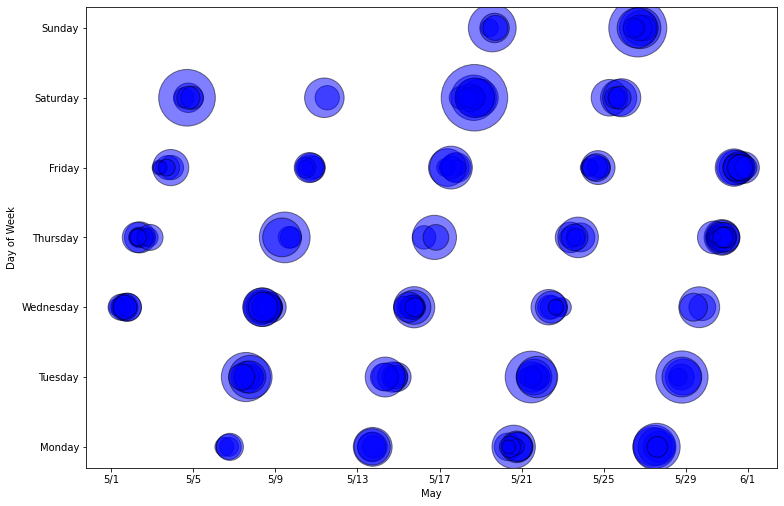

In [29]:
every_4 = ['5/1', '5/5', '5/9', '5/13', '5/17', '5/21', '5/25', '5/29', '6/1']
#hours = ['0000', '0100', '0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200','1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300']
x_values_may = sorted_may_sample_df['DateTime']
y_values_may = sorted_may_sample_df['DayName']
duration_may = sorted_may_sample_df['Duration']
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,.8,.8])
ax.scatter(x_values_may, y_values_may, s=duration_may, c="blue", alpha=0.5, edgecolor="black")
ax.set_xlabel('May')
ax.set_ylabel('Day of Week')
ax.set_xticklabels(every_4)
#ax.set_yticklabels(hours)

plt.show()

In [31]:

combined_2020_df["DayName"] = combined_2020_df["DateTime"].dt.day_name()
combined_2020_df["DayNum"] = combined_2020_df["DateTime"].dt.weekday

outlierIndex_20 = combined_2020_df[combined_2020_df["Duration"] 
                                > (combined_2020_df["Duration"].mean() + (2 * (combined_2020_df["Duration"].std())))].index

combined_2020_df.drop(outlierIndex_20, inplace=True)

sample_2020_df = combined_2020_df.sample(200)
sample_2020_df["DayInYear"] = sample_2020_df["DateTime"].dt.strftime('%j')
sorted_sample_2020_df = sample_2020_df.sort_values(by="Date")
sorted_sample_2020_df.sort_values(by="DayNum", inplace=True)
sorted_sample_2020_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date,DayName,DayNum,DayInYear
1446195,1424.0,2020-09-07 07:53:32,2020-09-07 08:17:16,D8007892C14296E0,member,2020-09-07 07:53:32,07:53,Sep,09/07/20,Monday,0,251
1591112,382.0,2020-09-21 19:00:11,2020-09-21 19:06:33,A4087BEBCD43DA72,member,2020-09-21 19:00:11,19:00,Sep,09/21/20,Monday,0,265
1473409,3676.0,2020-09-07 16:36:47,2020-09-07 17:38:03,C23DBFFF27FB3650,member,2020-09-07 16:36:47,16:36,Sep,09/07/20,Monday,0,251
338992,246.0,2020-02-24 09:45:45,2020-02-24 09:49:52,W20009,Member,2020-02-24 09:45:45,09:45,Feb,02/24/20,Monday,0,055
1447154,2430.0,2020-09-07 15:16:59,2020-09-07 15:57:29,D39F782594970519,member,2020-09-07 15:16:59,15:16,Sep,09/07/20,Monday,0,251


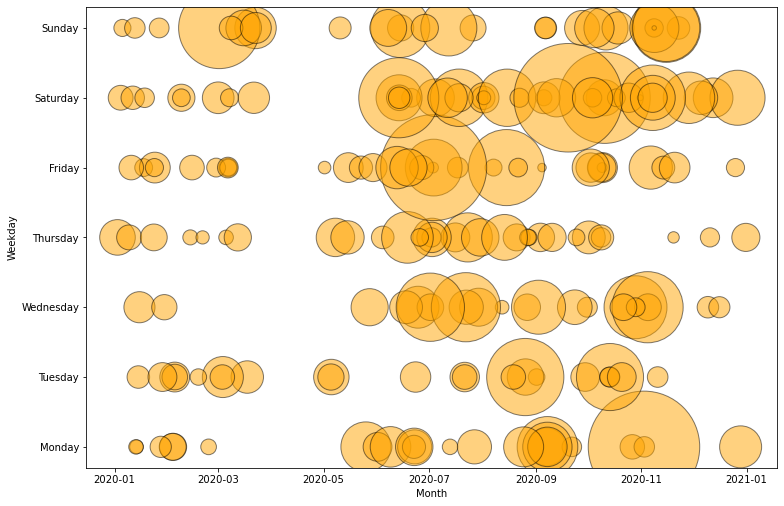

In [32]:
x_values_20 = sorted_sample_2020_df['DateTime']
y_values_20 = sorted_sample_2020_df['DayName']
duration_20 = sorted_sample_2020_df['Duration']
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,.8,.8])
ax.scatter(x_values_20, y_values_20, s=duration_20, c="orange", alpha=0.5, edgecolor="black")
ax.set_xlabel('Month')
ax.set_ylabel('Weekday')

plt.show()

In [33]:
is_May_20 = combined_2020_df['Month']=='May'
may_2020_df = combined_2020_df[is_May_20]
#may_2020_df.head()
may_20_sample_df = may_2020_df.sample(200)
#may_20_sample_df.tail()
sorted_may_20_sample_df = may_20_sample_df.sort_values(by="Date")
sorted_may_20_sample_df.sort_values(by="DayNum", inplace=True)
#sorted_may_20_sample_df.head()

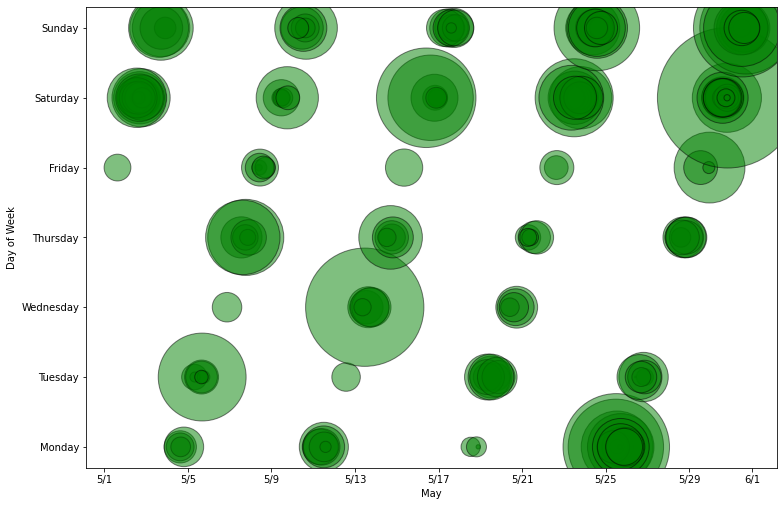

In [35]:
every_4 = ['5/1', '5/5', '5/9', '5/13', '5/17', '5/21', '5/25', '5/29', '6/1']
x_values_may_20 = sorted_may_20_sample_df['DateTime']
y_values_may_20 = sorted_may_20_sample_df['DayName']
duration_may_20 = sorted_may_20_sample_df['Duration']
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,.8,.8])
ax.scatter(x_values_may_20, y_values_may_20, s=duration_may_20, c="green", alpha=0.5, edgecolor="black")
ax.set_xlabel('May')
ax.set_ylabel('Day of Week')
ax.set_xticklabels(every_4)

plt.show()